In [23]:
# Import Dependencies
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
# Define paths
train_dir = 'ASL_Alphabet_Dataset/asl_alphabet_train'
test_dir = 'ASL_Alphabet_Dataset/asl_alphabet_test'


batch_size = 32

# # ImageDataGenerator for data augmentation and normalization 
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255.0, # Normalize the pixel values to be between 0 and 1
#     shear_range=0.2, # Shear the image)
#     zoom_range=0.2, # Zoom the image
#     horizontal_flip=True, # Flip the image horizontally
#     validation_split=0.2 # Split the data into training and validation sets
# )

# test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# # Create training and validation generators
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(64, 64),
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='training' # Use the training subset
# )

# validation_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(64, 64),
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation' # Use the validation subset
# )




c:\Users\awils\anaconda3\envs\dev4\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


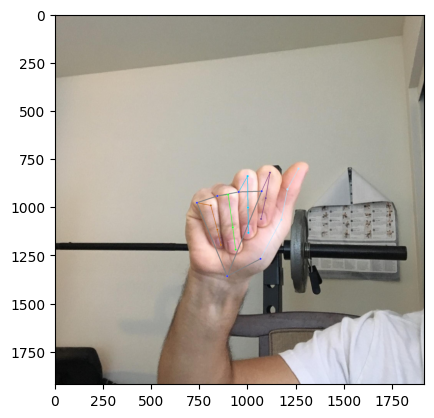

<Figure size 640x480 with 0 Axes>

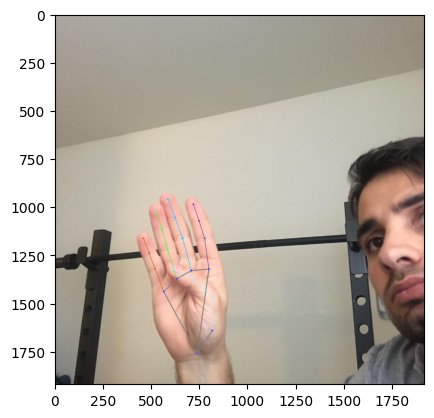

<Figure size 640x480 with 0 Axes>

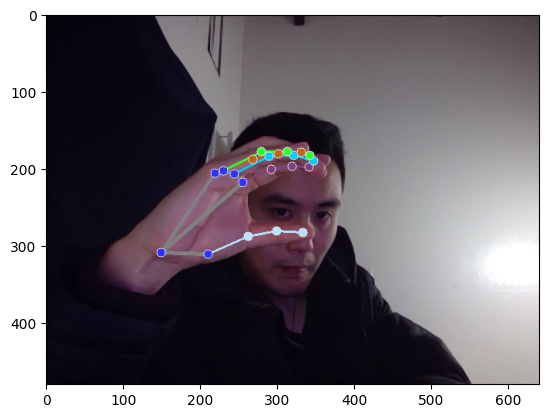

<Figure size 640x480 with 0 Axes>

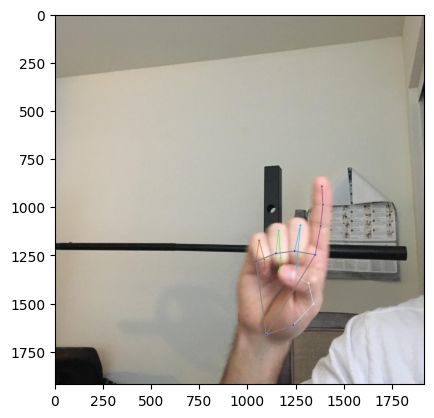

<Figure size 640x480 with 0 Axes>

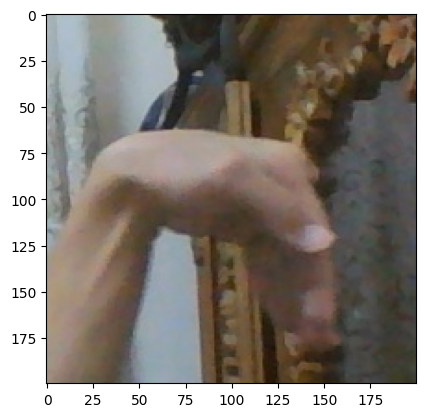

<Figure size 640x480 with 0 Axes>

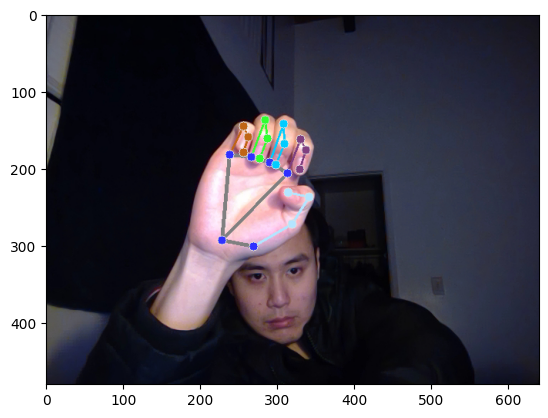

<Figure size 640x480 with 0 Axes>

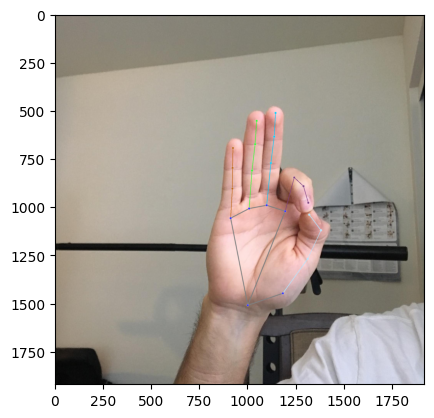

<Figure size 640x480 with 0 Axes>

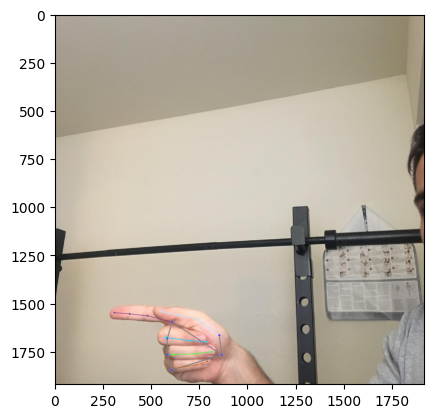

<Figure size 640x480 with 0 Axes>

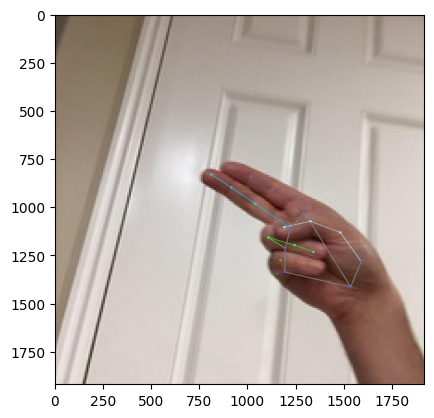

<Figure size 640x480 with 0 Axes>

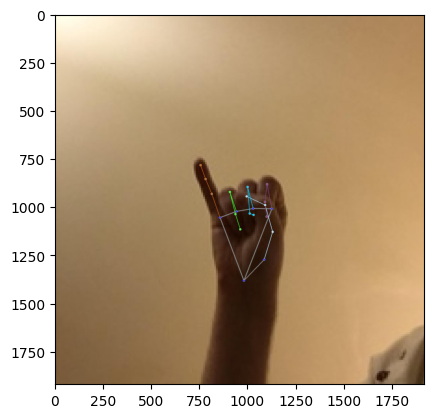

<Figure size 640x480 with 0 Axes>

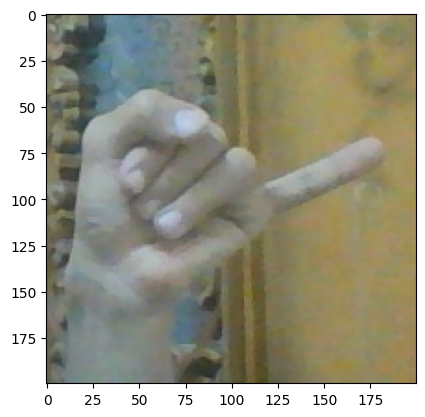

<Figure size 640x480 with 0 Axes>

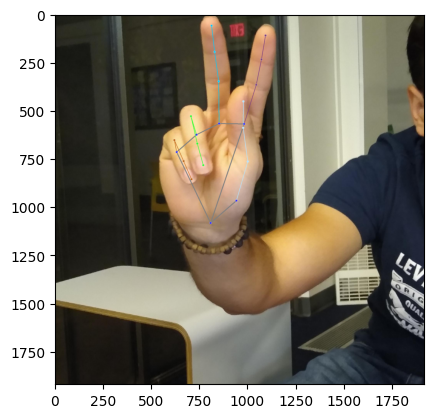

<Figure size 640x480 with 0 Axes>

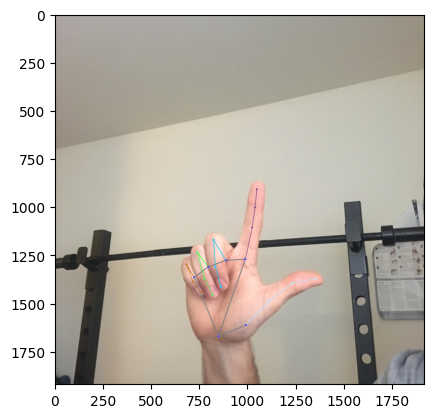

<Figure size 640x480 with 0 Axes>

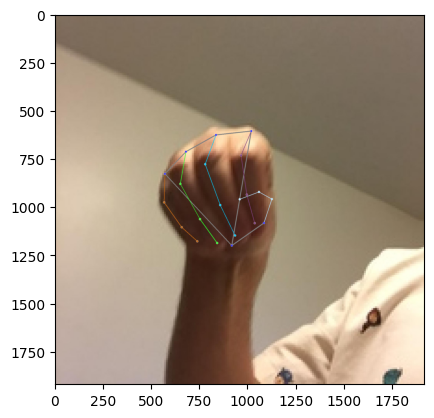

<Figure size 640x480 with 0 Axes>

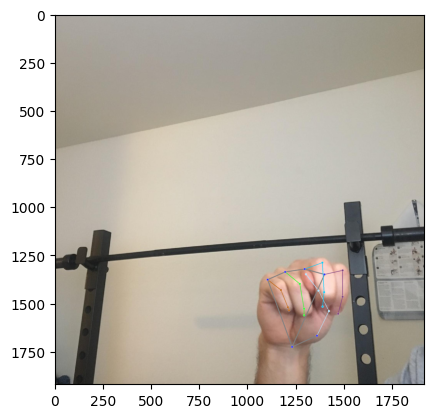

<Figure size 640x480 with 0 Axes>

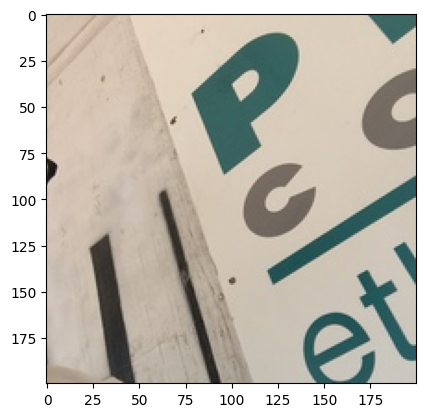

<Figure size 640x480 with 0 Axes>

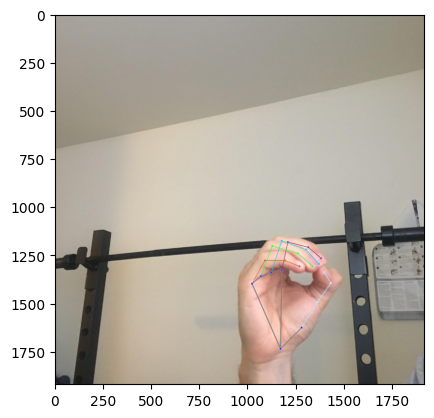

<Figure size 640x480 with 0 Axes>

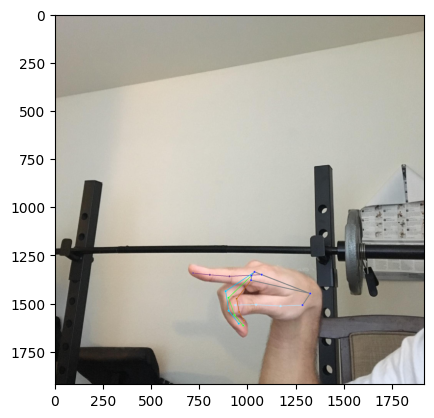

<Figure size 640x480 with 0 Axes>

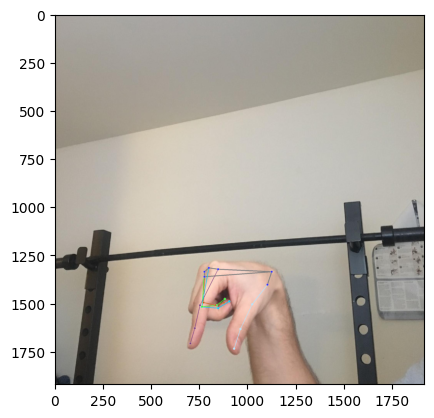

<Figure size 640x480 with 0 Axes>

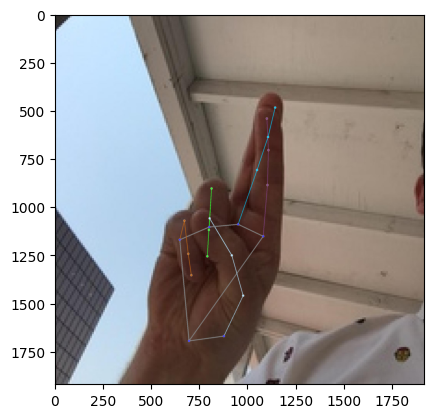

<Figure size 640x480 with 0 Axes>

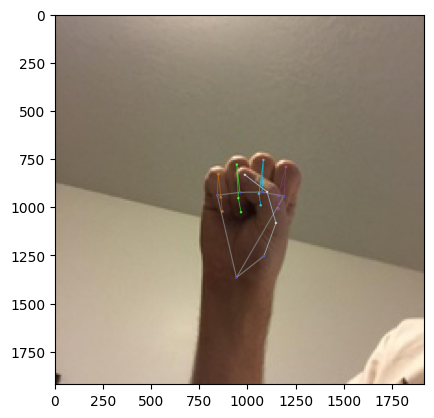

<Figure size 640x480 with 0 Axes>

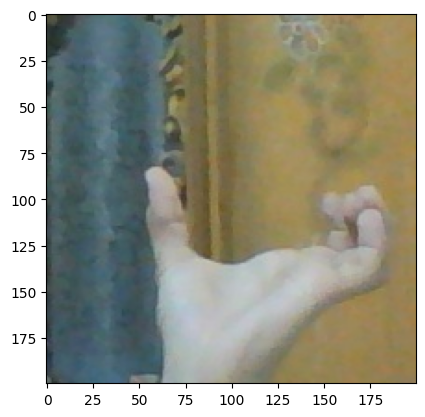

<Figure size 640x480 with 0 Axes>

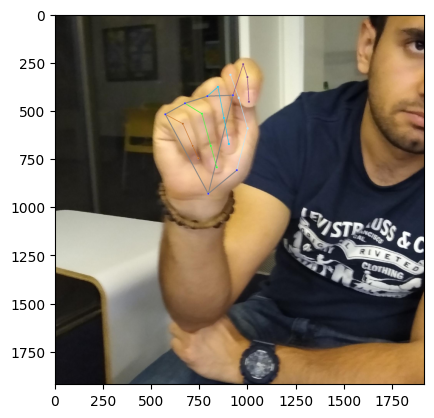

<Figure size 640x480 with 0 Axes>

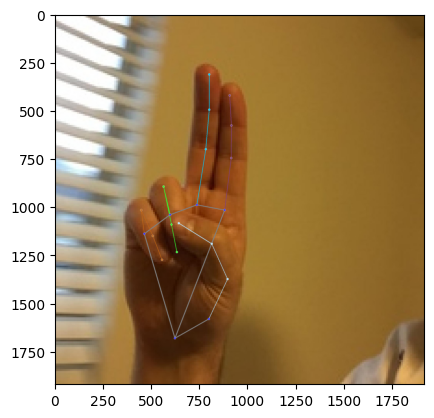

<Figure size 640x480 with 0 Axes>

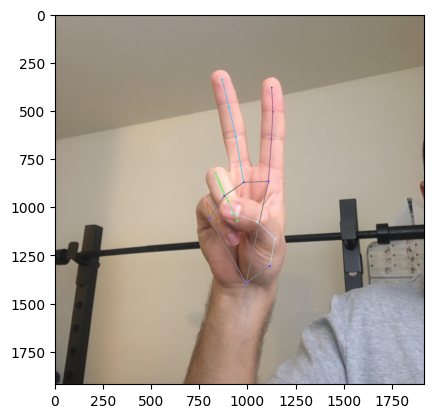

<Figure size 640x480 with 0 Axes>

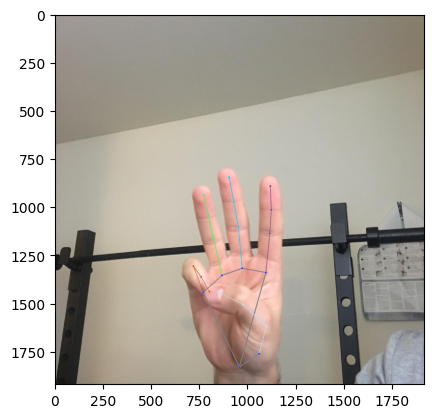

<Figure size 640x480 with 0 Axes>

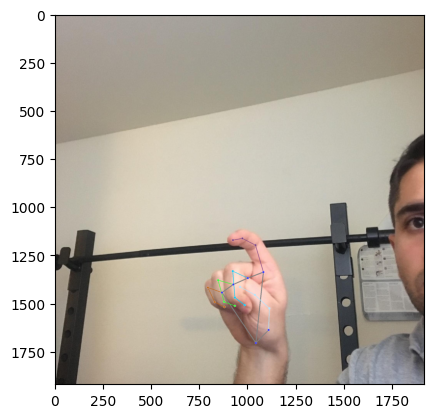

<Figure size 640x480 with 0 Axes>

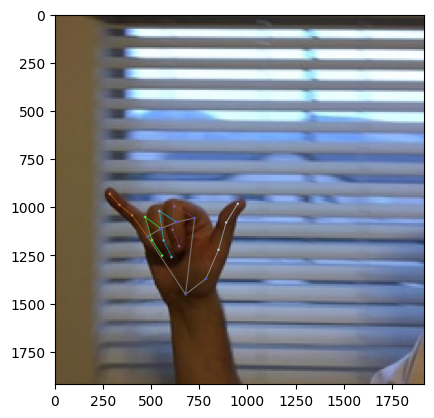

<Figure size 640x480 with 0 Axes>

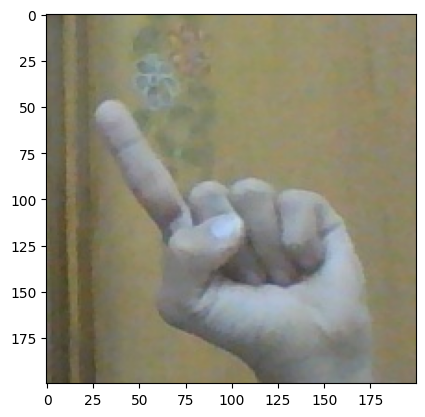

<Figure size 640x480 with 0 Axes>

In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

for dir_ in os.listdir(train_dir):
    for img_path in os.listdir(os.path.join(train_dir, dir_))[:1]:
        img = cv2.imread(os.path.join(train_dir, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(img_rgb, 
                                        hand_landmarks, 
                                        mp_hands.HAND_CONNECTIONS,
                                        mp_drawing_styles.get_default_hand_landmarks_style(),
                                        mp_drawing_styles.get_default_hand_connections_style())

        plt.imshow(img_rgb)

        plt.figure()
        plt.show()
        break

In [31]:
import os
import cv2
import pickle
import mediapipe as mp
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def process_images(train_dir, output_file, fixed_length=63):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)
    data = []
    labels = []

    # List all directories and files in the training directory
    all_files = [(os.path.join(train_dir, dir_, img), dir_)
                 for dir_ in os.listdir(train_dir)
                 for img in os.listdir(os.path.join(train_dir, dir_))]

    # Process each image in the training directory with a progress tracker
    for img_path, dir_ in tqdm(all_files, desc="Processing images", unit="image"):
        img = cv2.imread(img_path)
        if img is not None:
            # Resize image to a consistent size
            img_resized = cv2.resize(img, (256, 256))
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                data_aux = []
                for hand_landmarks in results.multi_hand_landmarks:
                    for landmark in hand_landmarks.landmark:
                        data_aux.extend([landmark.x, landmark.y, landmark.z])
                # Pad or trim the sequence to the fixed length
                if len(data_aux) > fixed_length * 3:
                    data_aux = data_aux[:fixed_length * 3]
                data_padded = pad_sequences([data_aux], maxlen=fixed_length * 3, padding='post', dtype='float32')[0]
                data.append(data_padded)
                labels.append(dir_)

    # Convert to numpy arrays for consistency
    data = np.array(data)
    labels = np.array(labels)

    # Save the data to a pickle file
    with open(output_file, 'wb') as f:
        pickle.dump((data, labels), f)

# Process the images with a fixed length
process_images(train_dir, 'sign_language_data_recaptured_fixed.pkl', fixed_length=63)



Processing images:   0%|          | 0/223074 [00:00<?, ?image/s]c:\Users\awils\anaconda3\envs\dev4\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing images: 100%|██████████| 223074/223074 [1:06:51<00:00, 55.61image/s]


Number of samples: 161317
First sample data: [0.465173602104187, 0.7084599733352661, -5.045814646109648e-07, 0.5556532740592957, 0.6617145538330078, -0.03032880835235119, 0.6115933656692505, 0.5561193823814392, -0.03723641857504845, 0.6285759210586548, 0.473867267370224, -0.04519462585449219, 0.6578848958015442, 0.4179717004299164, -0.046813853085041046, 0.5585945248603821, 0.47888872027397156, -0.009482753463089466, 0.5808136463165283, 0.4287700355052948, -0.05898085981607437, 0.5695945024490356, 0.49752819538116455, -0.08380289375782013, 0.5571154356002808, 0.5538750886917114, -0.08991729468107224, 0.49642273783683777, 0.48114973306655884, -0.00990061555057764, 0.5206539034843445, 0.43829572200775146, -0.07042176276445389, 0.521477460861206, 0.5233404636383057, -0.0847635343670845, 0.5227134227752686, 0.5914878249168396, -0.07600847631692886, 0.4390183091163635, 0.49212440848350525, -0.01865132339298725, 0.467997670173645, 0.4883330762386322, -0.07947660982608795, 0.48038607835769653

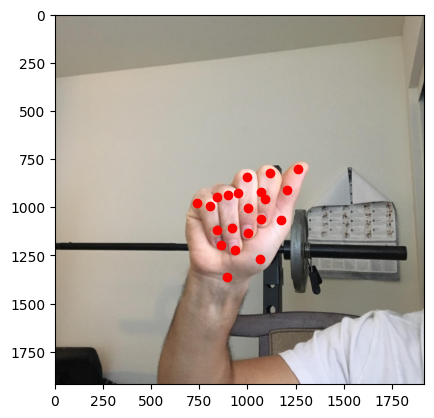

In [32]:
# Load data from pickle file
with open('sign_language_data.pkl', 'rb') as f:
    data, labels = pickle.load(f)

# Inspect the data
print("Number of samples:", len(data))
print("First sample data:", data[0])
print("First sample label:", labels[0])

# Function to visualize landmarks on an image
def visualize_landmarks(img_path, landmarks):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    for i in range(0, len(landmarks), 3):
        x = landmarks[i] * img.shape[1]
        y = landmarks[i + 1] * img.shape[0]
        plt.scatter(x, y, c='r', marker='o')
    plt.show()

# Visualize the first sample's landmarks on its image
first_img_path = os.path.join(train_dir, labels[0], os.listdir(os.path.join(train_dir, labels[0]))[0])
visualize_landmarks(first_img_path, data[0])



In [33]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Load data from pickle file
with open('sign_language_data_recaptured_fixed.pkl', 'rb') as f:
    data, labels = pickle.load(f)

# Convert labels to numpy array
labels = np.array(labels)

# Normalize data (coordinates are assumed to be in the range 0-1)
data = np.array(data)

# Encode labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

# Reshape data to add a channel dimension
X_train = X_train.reshape((X_train.shape[0], 63, 3, 1))
X_test = X_test.reshape((X_test.shape[0], 63, 3, 1))

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(63, 3, 1)),
    MaxPooling2D((2, 1)),
    Conv2D(64, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Save the model
model.save('asl_model_tuned.keras')



Epoch 1/20


c:\Users\awils\anaconda3\envs\dev4\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6953 - loss: 1.1446 - val_accuracy: 0.9508 - val_loss: 0.2071
Epoch 2/20
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9551 - loss: 0.1814 - val_accuracy: 0.9604 - val_loss: 0.1559
Epoch 3/20
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9659 - loss: 0.1298 - val_accuracy: 0.9700 - val_loss: 0.1192
Epoch 4/20
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9735 - loss: 0.1007 - val_accuracy: 0.9720 - val_loss: 0.1144
Epoch 5/20
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9770 - loss: 0.0871 - val_accuracy: 0.9761 - val_loss: 0.1017
Epoch 6/20
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9801 - loss: 0.0741 - val_accuracy: 0.9788 - val_loss: 0.0894
Epoch 7/20
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9819 - loss: 0.0636 - val_accuracy: 0.9799 - val_loss: 0.0817
Epoch 8/20
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9845 - loss: 0.0572 - val_accurac

In [34]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 61, 3, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 3, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 3, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       344,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,062,809 (4.05 MB)

 Trainable params: 354,269 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 708,540 (2.70 MB)

In [27]:
import os
import cv2
import pickle
import mediapipe as mp
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

data = []
labels = []

# List all directories and files in the training directory
all_files = [(os.path.join(train_dir, dir_, img), dir_)
             for dir_ in os.listdir(train_dir)
             for img in os.listdir(os.path.join(train_dir, dir_))]

# Process a small subset of images (e.g., 2000 images)
for img_path, dir_ in tqdm(all_files[:2000], desc="Processing images", unit="image"):
    img = cv2.imread(img_path)
    if img is not None:
        # Resize image to a consistent size
        img_resized = cv2.resize(img, (256, 256))
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            data_aux = []
            for hand_landmarks in results.multi_hand_landmarks:
                for landmark in hand_landmarks.landmark:
                    data_aux.extend([landmark.x, landmark.y, landmark.z])
            data.append(data_aux)
            labels.append(dir_)
            print(f"Processed {img_path}, resulting data length: {len(data_aux)}")

# Find the maximum length of the sequences
max_length = max(len(sample) for sample in data)
print(f"Maximum sequence length: {max_length}")

# Pad sequences to ensure they all have the same length
data_padded = pad_sequences(data, maxlen=max_length, padding='post', dtype='float32')

# Verify shapes after padding
print(f"Shape of data_padded: {data_padded.shape}")

# Save the data to a pickle file
with open('sign_language_data_recaptured_small.pkl', 'wb') as f:
    pickle.dump((data_padded, labels), f)





Processing images:   0%|          | 0/2000 [00:00<?, ?image/s]c:\Users\awils\anaconda3\envs\dev4\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing images:   0%|          | 4/2000 [00:00<00:57, 34.72image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\1.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\10.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\100.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\101.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\102.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\103.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\104.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\105.jpg, resulting data length: 63


Processing images:   1%|          | 14/2000 [00:00<00:47, 42.10image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\106.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\107.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\108.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\109.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\11.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\110.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\111.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\112.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\113.jpg, resulting data length: 63


Processing images:   1%|          | 24/2000 [00:00<00:45, 43.07image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\114.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\115.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\116.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\117.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\118.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\119.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\12.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\120.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\121.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\122.jpg, resulting data length: 63


Processing images:   2%|▏         | 34/2000 [00:00<00:44, 44.62image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\123.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\124.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\125.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\126.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\127.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\128.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\129.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\13.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\130.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\131.jpg, resulting data length: 63


Processing images:   2%|▏         | 44/2000 [00:01<00:43, 44.61image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\132.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\133.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\134.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\135.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\136.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\137.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\138.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\139.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\14.jpg, resulting data length: 63


Processing images:   3%|▎         | 54/2000 [00:01<00:43, 44.43image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\140.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\141.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\142.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\143.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\144.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\145.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\146.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\147.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\148.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\149.jpg, resulting data length: 63


Processing images:   3%|▎         | 64/2000 [00:01<00:43, 44.03image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\15.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\150.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\151.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\152.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\153.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\154.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\155.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\156.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\157.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\158.jpg, resulting data length: 63


Processing images:   4%|▎         | 74/2000 [00:01<00:43, 44.15image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\159.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\16.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\160.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\161.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\162.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\163.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\164.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\165.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\166.jpg, resulting data length: 63


Processing images:   4%|▍         | 79/2000 [00:01<00:44, 43.43image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\167.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\168.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\169.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\17.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\170.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\171.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\172.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\173.jpg, resulting data length: 63


Processing images:   4%|▍         | 89/2000 [00:02<00:42, 44.96image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\174.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\175.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\176.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\177.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\178.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\179.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\180.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\181.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\182.jpg, resulting data length: 63


Processing images:   5%|▍         | 99/2000 [00:02<00:41, 45.80image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\183.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\184.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\185.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\186.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\187.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\188.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\189.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\19.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\190.jpg, resulting data length: 63


Processing images:   5%|▌         | 109/2000 [00:02<00:45, 41.61image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\191.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\192.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\193.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\194.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\195.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\196.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\197.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\198.jpg, resulting data length: 63


Processing images:   6%|▌         | 118/2000 [00:02<00:48, 38.91image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\199.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\2.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\20.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\200.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\201.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\202.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\203.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\204.jpg, resulting data length: 63


Processing images:   6%|▋         | 126/2000 [00:02<00:48, 38.29image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\205.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\206.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\207.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\208.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\209.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\21.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\210.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\211.jpg, resulting data length: 63


Processing images:   7%|▋         | 135/2000 [00:03<00:48, 38.14image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\212.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\213.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\214.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\215.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\216.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\217.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\218.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\219.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\22.jpg, resulting data length: 63


Processing images:   7%|▋         | 143/2000 [00:03<00:47, 38.84image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\220.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\221.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\222.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\223.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\224.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\225.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\226.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\227.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\228.jpg, resulting data length: 63


Processing images:   8%|▊         | 151/2000 [00:03<00:48, 38.40image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\229.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\23.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\230.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\231.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\232.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\233.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\234.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\235.jpg, resulting data length: 63


Processing images:   8%|▊         | 159/2000 [00:03<00:49, 37.48image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\236.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\237.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\238.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\239.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\24.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\240.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\241.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\242.jpg, resulting data length: 63


Processing images:   8%|▊         | 168/2000 [00:04<00:48, 37.73image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\243.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\244.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\245.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\246.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\247.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\248.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\249.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\25.jpg, resulting data length: 63


Processing images:   9%|▉         | 176/2000 [00:04<00:47, 38.48image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\250.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\251.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\252.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\253.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\254.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\255.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\256.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\257.jpg, resulting data length: 63


Processing images:   9%|▉         | 180/2000 [00:04<00:48, 37.21image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\258.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\259.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\26.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\260.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\261.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\262.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\263.jpg, resulting data length: 63


Processing images:   9%|▉         | 188/2000 [00:04<00:47, 38.29image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\264.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\265.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\266.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\267.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\268.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\269.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\27.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\270.jpg, resulting data length: 63


Processing images:  10%|█         | 200/2000 [00:04<00:47, 37.54image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\271.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\272.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\273.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\274.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\275.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\276.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\277.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\278.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\279.jpg, resulting data length: 63


Processing images:  10%|█         | 204/2000 [00:05<00:48, 36.98image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\28.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\280.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\281.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\282.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\283.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\284.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\285.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\286.jpg, resulting data length: 63


Processing images:  11%|█         | 213/2000 [00:05<00:48, 37.01image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\287.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\288.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\289.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\29.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\290.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\291.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\292.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\293.jpg, resulting data length: 63


Processing images:  11%|█         | 222/2000 [00:05<00:46, 38.41image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\294.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\295.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\296.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\297.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\298.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\299.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\3.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\30.jpg, resulting data length: 63


Processing images:  12%|█▏        | 230/2000 [00:05<00:47, 37.09image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\300.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\301.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\302.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\303.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\304.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\305.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\306.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\307.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\308.jpg, resulting data length: 63


Processing images:  12%|█▏        | 239/2000 [00:05<00:47, 37.10image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\309.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\31.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\310.jpg, resulting data length: 126
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\311.jpg, resulting data length: 126
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\312.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\313.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\314.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\315.jpg, resulting data length: 63


Processing images:  12%|█▏        | 247/2000 [00:06<00:46, 37.80image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\316.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\317.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\318.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\319.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\32.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\320.jpg, resulting data length: 126
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\321.jpg, resulting data length: 126
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\322.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\323.jpg, resulting data length: 63


Processing images:  13%|█▎        | 259/2000 [00:06<00:46, 37.60image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\324.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\325.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\326.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\327.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\328.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\329.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\33.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\330.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\331.jpg, resulting data length: 63


Processing images:  13%|█▎        | 267/2000 [00:06<00:45, 38.05image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\332.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\333.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\334.jpg, resulting data length: 126
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\335.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\336.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\337.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\338.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\339.jpg, resulting data length: 63


Processing images:  14%|█▍        | 275/2000 [00:06<00:46, 36.97image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\34.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\340.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\341.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\342.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\343.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\344.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\345.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\346.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\347.jpg, resulting data length: 63


Processing images:  14%|█▍        | 283/2000 [00:07<00:46, 36.82image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\348.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\349.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\35.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\350.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\351.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\352.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\353.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\355.jpg, resulting data length: 63


Processing images:  15%|█▍        | 294/2000 [00:07<00:42, 40.36image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\359.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\36.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\360.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\361.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\362.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\363.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\364.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\365.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\366.jpg, resulting data length: 63


Processing images:  15%|█▌        | 303/2000 [00:07<00:44, 38.25image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\367.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\368.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\369.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\37.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\370.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\371.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\372.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\373.jpg, resulting data length: 63


Processing images:  16%|█▌        | 311/2000 [00:07<00:43, 38.48image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\374.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\375.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\376.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\377.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\378.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\379.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\38.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\380.jpg, resulting data length: 63


Processing images:  16%|█▌        | 319/2000 [00:08<00:44, 37.76image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\381.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\382.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\383.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\384.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\385.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\386.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\387.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\388.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\389.jpg, resulting data length: 63


Processing images:  17%|█▋        | 331/2000 [00:08<00:44, 37.21image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\39.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\390.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\391.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\392.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\393.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\394.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\395.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\396.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\397.jpg, resulting data length: 63


Processing images:  17%|█▋        | 335/2000 [00:08<00:47, 35.39image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\398.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\399.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\4.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\40.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\400.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\401.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\402.jpg, resulting data length: 63


Processing images:  17%|█▋        | 343/2000 [00:08<00:45, 36.58image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\403.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\404.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\405.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\406.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\407.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\408.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\409.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\41.jpg, resulting data length: 63


Processing images:  18%|█▊        | 351/2000 [00:08<00:44, 36.86image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\410.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\411.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\412.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\413.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\414.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\415.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\416.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\417.jpg, resulting data length: 63


Processing images:  18%|█▊        | 359/2000 [00:09<00:43, 37.54image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\418.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\419.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\42.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\421.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\422.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\424.jpg, resulting data length: 63


Processing images:  18%|█▊        | 367/2000 [00:09<00:44, 36.51image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\425.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\426.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\427.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\428.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\43.jpg, resulting data length: 63


Processing images:  19%|█▉        | 382/2000 [00:09<00:41, 38.75image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\436.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\438.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\439.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\44.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\440.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\441.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\442.jpg, resulting data length: 63


Processing images:  20%|█▉        | 390/2000 [00:09<00:42, 37.44image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\443.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\444.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\445.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\446.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\447.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\448.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\449.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\45.jpg, resulting data length: 63


Processing images:  20%|█▉        | 398/2000 [00:10<00:42, 37.45image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\450.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\451.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\452.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\453.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\454.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\455.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\456.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\457.jpg, resulting data length: 63


Processing images:  20%|██        | 406/2000 [00:10<00:42, 37.36image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\458.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\459.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\46.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\460.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\461.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\462.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\463.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\464.jpg, resulting data length: 63


Processing images:  21%|██        | 414/2000 [00:10<00:42, 36.91image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\465.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\466.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\467.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\468.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\469.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\47.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\470.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\471.jpg, resulting data length: 63


Processing images:  21%|██        | 422/2000 [00:10<00:41, 37.82image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\472.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\473.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\474.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\475.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\476.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\477.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\478.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\479.jpg, resulting data length: 63


Processing images:  22%|██▏       | 430/2000 [00:11<00:42, 36.92image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\48.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\480.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\481.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\482.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\483.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\484.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\485.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\486.jpg, resulting data length: 63


Processing images:  22%|██▏       | 434/2000 [00:11<00:43, 36.15image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\487.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\488.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\489.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\49.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\490.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\491.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\492.jpg, resulting data length: 63


Processing images:  22%|██▏       | 442/2000 [00:11<00:41, 37.21image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\493.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\494.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\495.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\496.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\497.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\498.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\499.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\5.jpg, resulting data length: 63


Processing images:  23%|██▎       | 454/2000 [00:11<00:41, 36.98image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\50.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\500.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\501.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\502.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\503.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\504.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\505.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\506.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\507.jpg, resulting data length: 63


Processing images:  23%|██▎       | 458/2000 [00:11<00:42, 36.49image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\508.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\509.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\51.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\510.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\511.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\512.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\513.jpg, resulting data length: 63


Processing images:  23%|██▎       | 466/2000 [00:12<00:42, 36.46image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\514.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\515.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\516.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\517.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\518.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\519.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\52.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\520.jpg, resulting data length: 63


Processing images:  24%|██▎       | 474/2000 [00:12<00:48, 31.54image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\521.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\522.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\523.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\524.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\525.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\526.jpg, resulting data length: 63


Processing images:  24%|██▍       | 478/2000 [00:12<00:50, 29.94image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\527.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\528.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\529.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\53.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\530.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\531.jpg, resulting data length: 63


Processing images:  24%|██▍       | 486/2000 [00:12<00:53, 28.36image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\532.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\533.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\534.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\535.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\536.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\537.jpg, resulting data length: 63


Processing images:  25%|██▍       | 494/2000 [00:13<00:47, 31.53image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\538.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\539.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\54.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\55.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\56.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\57.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\58.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\59.jpg, resulting data length: 63


Processing images:  25%|██▌       | 503/2000 [00:13<00:42, 35.12image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\6.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\60.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\61.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\62.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\63.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\64.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\65.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\66.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\67.jpg, resulting data length: 63


Processing images:  26%|██▌       | 512/2000 [00:13<00:40, 37.05image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\68.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\69.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\7.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\70.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\71.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\72.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\73.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\74.jpg, resulting data length: 63


Processing images:  26%|██▌       | 517/2000 [00:13<00:38, 38.24image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\75.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\76.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\77.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\78.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\79.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\8.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\80.jpg, resulting data length: 63


Processing images:  26%|██▋       | 525/2000 [00:13<00:38, 38.03image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\81.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\82.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\83.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\84.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\85.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\86.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\87.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\88.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\89.jpg, resulting data length: 63


Processing images:  27%|██▋       | 533/2000 [00:14<00:39, 37.59image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\9.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\90.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\91.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\92.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\93.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\94.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\95.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\96.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\97.jpg, resulting data length: 63


Processing images:  27%|██▋       | 543/2000 [00:14<00:36, 40.13image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\98.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\99.jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (10).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1000).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1001).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1002).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1003).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1004).jpg, resulting data length: 63


Processing images:  28%|██▊       | 553/2000 [00:14<00:33, 42.68image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1005).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1006).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1007).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1008).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1009).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1010).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1011).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1012).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1013).jpg, resulting data length: 63


Processing images:  28%|██▊       | 563/2000 [00:14<00:33, 43.53image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1014).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1015).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1016).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1017).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1018).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1019).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (102).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1020).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1021).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1022).jpg, resulting data length: 63


Processing images:  29%|██▊       | 573/2000 [00:14<00:32, 43.42image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1023).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1024).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1025).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1026).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1027).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1028).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1029).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1030).jpg, resulting data length: 63


Processing images:  29%|██▉       | 583/2000 [00:15<00:31, 44.43image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1031).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1032).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1033).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1034).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1035).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1036).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1037).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1038).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1039).jpg, resulting data length: 63


Processing images:  30%|██▉       | 593/2000 [00:15<00:30, 45.48image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1040).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1041).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1042).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1043).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1044).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1045).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1046).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1047).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1048).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1049).jpg, resulting data length: 63


Processing images:  30%|███       | 608/2000 [00:15<00:29, 46.64image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1050).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1051).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1052).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1053).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1054).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1055).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1056).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1057).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1058).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1059).jpg, resulting data length: 63


Processing images:  31%|███       | 613/2000 [00:15<00:30, 45.77image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1060).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1061).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1062).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1063).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1064).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1065).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1066).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1067).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1068).jpg, resulting data length: 63


Processing images:  31%|███       | 623/2000 [00:16<00:30, 45.15image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1069).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1070).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1071).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1072).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1073).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1074).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1075).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1076).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1077).jpg, resulting data length: 63


Processing images:  32%|███▏      | 633/2000 [00:16<00:29, 45.84image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1078).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1079).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1080).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1081).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1082).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1083).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1084).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1085).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1086).jpg, resulting data length: 63


Processing images:  32%|███▏      | 643/2000 [00:16<00:30, 45.01image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1087).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1088).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1089).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1090).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1091).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1092).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1093).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1094).jpg, resulting data length: 63


Processing images:  33%|███▎      | 653/2000 [00:16<00:30, 44.10image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1095).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1096).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1097).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1098).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1099).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (11).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1100).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1101).jpg, resulting data length: 63


Processing images:  33%|███▎      | 663/2000 [00:16<00:30, 44.54image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1102).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1103).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1104).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1105).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1106).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1107).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1108).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1109).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1110).jpg, resulting data length: 63


Processing images:  34%|███▎      | 673/2000 [00:17<00:29, 44.45image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1111).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1112).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1113).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1114).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1115).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1116).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1117).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1118).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1119).jpg, resulting data length: 63


Processing images:  34%|███▍      | 683/2000 [00:17<00:29, 43.97image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1120).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1121).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1122).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1123).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1124).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1125).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1126).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1127).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1128).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1129).jpg, resulting data length: 63


Processing images:  35%|███▍      | 693/2000 [00:17<00:29, 44.39image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1130).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1131).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1132).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1133).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1134).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1135).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1136).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1137).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1138).jpg, resulting data length: 63


Processing images:  35%|███▌      | 703/2000 [00:17<00:29, 43.62image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1139).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (114).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1140).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1141).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1142).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1143).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1144).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1145).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1146).jpg, resulting data length: 63


Processing images:  36%|███▌      | 713/2000 [00:18<00:29, 43.68image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1147).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1148).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1149).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1150).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1151).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1152).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1153).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1154).jpg, resulting data length: 63


Processing images:  36%|███▌      | 718/2000 [00:18<00:29, 43.96image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1155).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1156).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1157).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1158).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1159).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (116).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1160).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1161).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1162).jpg, resulting data length: 63


Processing images:  37%|███▋      | 733/2000 [00:18<00:27, 45.84image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1163).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1164).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1165).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1166).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1167).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1168).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1169).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1170).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1171).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1172).jpg, resulting data length: 63


Processing images:  37%|███▋      | 743/2000 [00:18<00:27, 46.04image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1173).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1174).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1175).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1176).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1177).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1178).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1179).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1180).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1181).jpg, resulting data length: 63


Processing images:  37%|███▋      | 748/2000 [00:18<00:27, 45.61image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1182).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1183).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1184).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1185).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1186).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1187).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1188).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1189).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (119).jpg, resulting data length: 63


Processing images:  38%|███▊      | 758/2000 [00:19<00:27, 45.33image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1190).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1191).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1192).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1193).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1194).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1195).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1196).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1197).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1198).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1199).jpg, resulting data length: 63


Processing images:  38%|███▊      | 768/2000 [00:19<00:27, 45.29image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (12).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (120).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1200).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1201).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1202).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1203).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1204).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1205).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1206).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1207).jpg, resulting data length: 63


Processing images:  39%|███▉      | 778/2000 [00:19<00:27, 45.24image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1208).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1209).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (121).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1210).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1211).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1212).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1213).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1214).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1215).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1216).jpg, resulting data length: 63


Processing images:  39%|███▉      | 788/2000 [00:19<00:26, 45.27image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1217).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1218).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1219).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (122).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1220).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1221).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1222).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1223).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1224).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1225).jpg, resulting data length: 63


Processing images:  40%|███▉      | 798/2000 [00:19<00:25, 46.37image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1226).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1227).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1228).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1229).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1230).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1231).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1232).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1233).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1234).jpg, resulting data length: 63


Processing images:  40%|████      | 808/2000 [00:20<00:25, 46.82image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1235).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1236).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1237).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1238).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1239).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1240).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1241).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1242).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1243).jpg, resulting data length: 63


Processing images:  41%|████      | 818/2000 [00:20<00:27, 43.21image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1244).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1245).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1246).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1247).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1248).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1249).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (125).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1250).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1251).jpg, resulting data length: 63


Processing images:  41%|████▏     | 828/2000 [00:20<00:27, 42.42image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1252).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1253).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1254).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1255).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1256).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1257).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1258).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1259).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1260).jpg, resulting data length: 63


Processing images:  42%|████▏     | 838/2000 [00:20<00:27, 41.74image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1261).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1262).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1263).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1264).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1265).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1266).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1267).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1268).jpg, resulting data length: 63


Processing images:  42%|████▏     | 843/2000 [00:21<00:28, 40.58image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1269).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1270).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1271).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1272).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1273).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1274).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1275).jpg, resulting data length: 63


Processing images:  43%|████▎     | 853/2000 [00:21<00:27, 41.32image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1276).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1277).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1278).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1279).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1280).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1281).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1282).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1283).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1284).jpg, resulting data length: 63


Processing images:  43%|████▎     | 868/2000 [00:21<00:25, 43.81image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1285).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1286).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1287).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1288).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1289).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1290).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1291).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1292).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1293).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1294).jpg, resulting data length: 63


Processing images:  44%|████▍     | 878/2000 [00:21<00:24, 45.21image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1295).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1296).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1297).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1298).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1299).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (13).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1300).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1301).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1302).jpg, resulting data length: 63


Processing images:  44%|████▍     | 888/2000 [00:22<00:24, 45.87image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1303).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1304).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1305).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1306).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1307).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1308).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1309).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1310).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1311).jpg, resulting data length: 63


Processing images:  45%|████▍     | 893/2000 [00:22<00:24, 45.49image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1312).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1313).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1314).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1315).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1316).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1317).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1318).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1319).jpg, resulting data length: 63


Processing images:  45%|████▌     | 903/2000 [00:22<00:24, 45.28image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1320).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1321).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1322).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1323).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1324).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1325).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1326).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1327).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1328).jpg, resulting data length: 63


Processing images:  46%|████▌     | 913/2000 [00:22<00:24, 45.27image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1329).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (133).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1330).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1331).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1332).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1333).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1334).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1335).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1336).jpg, resulting data length: 63


Processing images:  46%|████▌     | 923/2000 [00:22<00:23, 45.85image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1338).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1339).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1340).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1341).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1342).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1343).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1344).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1345).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1346).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1347).jpg, resulting data length: 63


Processing images:  47%|████▋     | 938/2000 [00:23<00:23, 45.80image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1348).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1350).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1351).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1352).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1353).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1354).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1355).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1356).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1357).jpg, resulting data length: 63


Processing images:  47%|████▋     | 948/2000 [00:23<00:22, 45.86image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1358).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1359).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1360).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1361).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1362).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1363).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1364).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1365).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1366).jpg, resulting data length: 63


Processing images:  48%|████▊     | 958/2000 [00:23<00:22, 45.39image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1367).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1368).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1369).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1370).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1371).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1372).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1373).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1374).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1375).jpg, resulting data length: 63


Processing images:  48%|████▊     | 968/2000 [00:23<00:22, 45.23image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1376).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1377).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1378).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1379).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1380).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1381).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1382).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1383).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1384).jpg, resulting data length: 63


Processing images:  49%|████▊     | 973/2000 [00:23<00:24, 42.42image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1385).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1386).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1387).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1388).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1389).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1390).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1391).jpg, resulting data length: 63


Processing images:  49%|████▉     | 983/2000 [00:24<00:26, 38.27image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1392).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1393).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1394).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1395).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1396).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1397).jpg, resulting data length: 126
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1398).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1399).jpg, resulting data length: 63


Processing images:  50%|████▉     | 993/2000 [00:24<00:24, 40.57image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (14).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1400).jpg, resulting data length: 126
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1401).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1402).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1403).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1404).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1405).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1406).jpg, resulting data length: 63


Processing images:  50%|████▉     | 998/2000 [00:24<00:24, 40.26image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1407).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1408).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1409).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1410).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1411).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1412).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1413).jpg, resulting data length: 63


Processing images:  50%|█████     | 1008/2000 [00:24<00:24, 40.93image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1414).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1415).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1416).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1417).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1418).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1419).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1420).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1421).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1422).jpg, resulting data length: 63


Processing images:  51%|█████     | 1018/2000 [00:25<00:23, 42.05image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1423).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1424).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1425).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1426).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1427).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1428).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1429).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1430).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1431).jpg, resulting data length: 63


Processing images:  51%|█████▏    | 1028/2000 [00:25<00:21, 44.37image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1432).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1433).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1434).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1435).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1436).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1437).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1438).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1439).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1440).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1441).jpg, resulting data length: 63


Processing images:  52%|█████▏    | 1038/2000 [00:25<00:21, 45.36image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1442).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1443).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1444).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1445).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1446).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1447).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1448).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1449).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1450).jpg, resulting data length: 63


Processing images:  52%|█████▏    | 1048/2000 [00:25<00:20, 45.74image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1451).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1452).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1453).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1454).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1455).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1456).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1457).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1458).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1459).jpg, resulting data length: 63


Processing images:  53%|█████▎    | 1058/2000 [00:25<00:20, 45.62image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1460).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1461).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1462).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1463).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1464).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1465).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1466).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1467).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1468).jpg, resulting data length: 63


Processing images:  53%|█████▎    | 1068/2000 [00:26<00:20, 45.87image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1469).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1470).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1471).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1472).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1473).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1474).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1475).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1476).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1477).jpg, resulting data length: 63


Processing images:  54%|█████▍    | 1078/2000 [00:26<00:20, 45.79image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1478).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1479).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1480).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1481).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1482).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1483).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1484).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1485).jpg, resulting data length: 63


Processing images:  54%|█████▍    | 1088/2000 [00:26<00:20, 45.36image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1486).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1487).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1488).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1489).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1490).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1491).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1492).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1493).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1494).jpg, resulting data length: 63


Processing images:  55%|█████▍    | 1098/2000 [00:26<00:19, 46.20image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1495).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1496).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1497).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1498).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1499).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (15).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1500).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1501).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1502).jpg, resulting data length: 63


Processing images:  55%|█████▌    | 1108/2000 [00:26<00:19, 45.48image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1503).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1504).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1505).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1506).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1507).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1508).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1509).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (151).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1510).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1511).jpg, resulting data length: 63


Processing images:  56%|█████▌    | 1118/2000 [00:27<00:19, 45.38image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1512).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1513).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1514).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1515).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1516).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1517).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1518).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1519).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1520).jpg, resulting data length: 63


Processing images:  56%|█████▋    | 1128/2000 [00:27<00:19, 44.57image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1521).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1522).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1523).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1524).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1525).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1526).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1527).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1528).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1529).jpg, resulting data length: 63


Processing images:  57%|█████▋    | 1138/2000 [00:27<00:19, 45.24image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1530).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1531).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1532).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1533).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1534).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1535).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1536).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1537).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1538).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1539).jpg, resulting data length: 63


Processing images:  57%|█████▋    | 1148/2000 [00:27<00:18, 45.60image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1540).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1541).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1542).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1543).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1544).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1545).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1546).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1547).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1548).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1549).jpg, resulting data length: 63


Processing images:  58%|█████▊    | 1158/2000 [00:28<00:18, 45.40image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1550).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1551).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1552).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1553).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1554).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1555).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1556).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1557).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1558).jpg, resulting data length: 63


Processing images:  58%|█████▊    | 1168/2000 [00:28<00:18, 45.34image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1559).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (156).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1560).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1561).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1562).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1563).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1564).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1565).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1566).jpg, resulting data length: 63


Processing images:  59%|█████▉    | 1178/2000 [00:28<00:17, 45.70image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1567).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1568).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1569).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1570).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1571).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1572).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1573).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1574).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1575).jpg, resulting data length: 63


Processing images:  59%|█████▉    | 1188/2000 [00:28<00:17, 46.42image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1576).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1577).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1578).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1579).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1580).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1581).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1582).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1583).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1584).jpg, resulting data length: 63


Processing images:  60%|█████▉    | 1198/2000 [00:28<00:17, 46.57image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1585).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1586).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1587).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1588).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1589).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1590).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1591).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1592).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1593).jpg, resulting data length: 63


Processing images:  60%|██████    | 1208/2000 [00:29<00:16, 46.60image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1594).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1595).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1596).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1597).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1598).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1599).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (16).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1600).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1601).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1602).jpg, resulting data length: 63


Processing images:  61%|██████    | 1218/2000 [00:29<00:17, 45.79image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1603).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1604).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1605).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1606).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1607).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1608).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1609).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1610).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1611).jpg, resulting data length: 63


Processing images:  61%|██████▏   | 1228/2000 [00:29<00:16, 46.07image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1612).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1613).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1614).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1615).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1616).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1617).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1618).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1619).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1620).jpg, resulting data length: 63


Processing images:  62%|██████▏   | 1238/2000 [00:29<00:16, 45.79image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1621).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1622).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1623).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1624).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1625).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1626).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1627).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1628).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1629).jpg, resulting data length: 63


Processing images:  62%|██████▏   | 1248/2000 [00:30<00:16, 44.84image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1630).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1631).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1632).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1633).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1634).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1635).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1636).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1637).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1638).jpg, resulting data length: 63


Processing images:  63%|██████▎   | 1258/2000 [00:30<00:16, 45.50image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1639).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1640).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1641).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1642).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1643).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1644).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1645).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1646).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1647).jpg, resulting data length: 63


Processing images:  63%|██████▎   | 1268/2000 [00:30<00:16, 45.47image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1648).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1649).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1650).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1651).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1652).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1653).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1654).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1655).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1656).jpg, resulting data length: 63


Processing images:  64%|██████▍   | 1278/2000 [00:30<00:15, 46.53image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1657).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1658).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1659).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1660).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1661).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1662).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1663).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1664).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1665).jpg, resulting data length: 63


Processing images:  64%|██████▍   | 1288/2000 [00:30<00:15, 46.51image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1666).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1667).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1668).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1669).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1670).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1671).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1672).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1673).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1674).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1675).jpg, resulting data length: 63


Processing images:  65%|██████▍   | 1298/2000 [00:31<00:15, 46.49image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1676).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1677).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1678).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1679).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1680).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1681).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1682).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1683).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1684).jpg, resulting data length: 63


Processing images:  65%|██████▌   | 1308/2000 [00:31<00:14, 46.46image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1685).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1686).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1687).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1688).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1689).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1690).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1691).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1692).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1693).jpg, resulting data length: 63


Processing images:  66%|██████▌   | 1318/2000 [00:31<00:15, 44.67image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1694).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1695).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1696).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1697).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1698).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1699).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (17).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1700).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1701).jpg, resulting data length: 63


Processing images:  66%|██████▋   | 1328/2000 [00:31<00:14, 45.04image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1702).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1703).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1704).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1705).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1706).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1707).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1708).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1709).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1710).jpg, resulting data length: 63


Processing images:  67%|██████▋   | 1338/2000 [00:32<00:14, 45.28image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1711).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1712).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1713).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1714).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1715).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1716).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1717).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1718).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1719).jpg, resulting data length: 63


Processing images:  67%|██████▋   | 1348/2000 [00:32<00:14, 45.56image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1720).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1721).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1722).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1723).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1724).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1725).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1726).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1727).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1728).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1729).jpg, resulting data length: 63


Processing images:  68%|██████▊   | 1358/2000 [00:32<00:14, 45.77image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1730).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1731).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1732).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1733).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1734).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1735).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1736).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1737).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1738).jpg, resulting data length: 63


Processing images:  68%|██████▊   | 1368/2000 [00:32<00:13, 46.23image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1739).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1740).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1741).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1742).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1743).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1744).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1745).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1746).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1747).jpg, resulting data length: 63


Processing images:  69%|██████▉   | 1378/2000 [00:32<00:13, 46.64image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1748).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1749).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1750).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1751).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1752).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1753).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1754).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1755).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1756).jpg, resulting data length: 63


Processing images:  69%|██████▉   | 1388/2000 [00:33<00:13, 46.80image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1757).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1758).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1759).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1760).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1761).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1762).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1763).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1764).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1765).jpg, resulting data length: 63


Processing images:  70%|██████▉   | 1398/2000 [00:33<00:12, 46.88image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1766).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1767).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1768).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1769).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1770).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1771).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1772).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1773).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1774).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1775).jpg, resulting data length: 63


Processing images:  70%|███████   | 1408/2000 [00:33<00:12, 46.66image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1776).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1777).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1778).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1779).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1780).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1781).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1782).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1783).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1784).jpg, resulting data length: 63


Processing images:  71%|███████   | 1418/2000 [00:33<00:12, 46.91image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1785).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1786).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1787).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1788).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1789).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1790).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1791).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1792).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1793).jpg, resulting data length: 63


Processing images:  71%|███████▏  | 1428/2000 [00:33<00:12, 45.78image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1794).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1795).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1796).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1797).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1798).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1799).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (18).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1800).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1801).jpg, resulting data length: 63


Processing images:  72%|███████▏  | 1438/2000 [00:34<00:12, 45.88image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1802).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1803).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1804).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1805).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1806).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1807).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1808).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1809).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1810).jpg, resulting data length: 63


Processing images:  72%|███████▏  | 1448/2000 [00:34<00:11, 46.34image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1811).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1812).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1813).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1814).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1815).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1816).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1817).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1818).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1819).jpg, resulting data length: 63


Processing images:  73%|███████▎  | 1458/2000 [00:34<00:11, 46.20image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1820).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1821).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1822).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1823).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1824).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1825).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1826).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1827).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1828).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1829).jpg, resulting data length: 63


Processing images:  73%|███████▎  | 1468/2000 [00:34<00:11, 46.36image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1830).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1831).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1832).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1833).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1834).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1835).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1836).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1837).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1838).jpg, resulting data length: 63


Processing images:  74%|███████▍  | 1478/2000 [00:35<00:11, 46.32image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1839).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1840).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1841).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1842).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1843).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1844).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1845).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1846).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1847).jpg, resulting data length: 63


Processing images:  74%|███████▍  | 1488/2000 [00:35<00:11, 46.53image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1848).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1849).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1850).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1851).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1852).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1853).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1854).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1855).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1856).jpg, resulting data length: 63


Processing images:  75%|███████▍  | 1498/2000 [00:35<00:10, 46.66image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1857).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1858).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1859).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1860).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1861).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1862).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1863).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1864).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1865).jpg, resulting data length: 63


Processing images:  75%|███████▌  | 1508/2000 [00:35<00:10, 45.20image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1866).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1867).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1868).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1869).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1870).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1871).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1872).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1873).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1874).jpg, resulting data length: 63


Processing images:  76%|███████▌  | 1518/2000 [00:35<00:10, 46.12image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1875).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1876).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1877).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1878).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1879).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1880).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1881).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1882).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1883).jpg, resulting data length: 63


Processing images:  76%|███████▋  | 1528/2000 [00:36<00:10, 44.02image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1884).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1885).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1886).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1887).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1888).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1889).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1890).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1891).jpg, resulting data length: 63


Processing images:  77%|███████▋  | 1539/2000 [00:36<00:10, 45.51image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1892).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1893).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1894).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1895).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1896).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1897).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1898).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1899).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (19).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (190).jpg, resulting data length: 63


Processing images:  77%|███████▋  | 1549/2000 [00:36<00:09, 45.31image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1900).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1901).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1902).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1903).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1904).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1905).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1906).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1907).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1908).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1909).jpg, resulting data length: 63


Processing images:  78%|███████▊  | 1559/2000 [00:36<00:09, 45.42image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1910).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1911).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1912).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1913).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1914).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1915).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1916).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1917).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1918).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1919).jpg, resulting data length: 63


Processing images:  78%|███████▊  | 1569/2000 [00:37<00:09, 45.67image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1920).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1921).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1922).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1923).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1924).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1925).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1926).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1927).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1928).jpg, resulting data length: 63


Processing images:  79%|███████▉  | 1579/2000 [00:37<00:09, 45.97image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1929).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1930).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1931).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1932).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1933).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1934).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1935).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1936).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1937).jpg, resulting data length: 63


Processing images:  79%|███████▉  | 1589/2000 [00:37<00:09, 45.55image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1938).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1939).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1940).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1941).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1942).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1943).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1944).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1945).jpg, resulting data length: 63


Processing images:  80%|███████▉  | 1599/2000 [00:37<00:08, 46.67image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1946).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1947).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1948).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1949).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1950).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1951).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1952).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1953).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1954).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1955).jpg, resulting data length: 63


Processing images:  80%|████████  | 1609/2000 [00:37<00:08, 46.54image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1956).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1957).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1958).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1959).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1960).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1961).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1962).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1963).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1964).jpg, resulting data length: 63


Processing images:  81%|████████  | 1619/2000 [00:38<00:08, 46.37image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1965).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1966).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1967).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1968).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1969).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1970).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1971).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1972).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1973).jpg, resulting data length: 63


Processing images:  81%|████████▏ | 1629/2000 [00:38<00:07, 46.83image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1974).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1975).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1976).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1977).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1978).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1979).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1980).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1981).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1982).jpg, resulting data length: 63


Processing images:  82%|████████▏ | 1639/2000 [00:38<00:07, 45.90image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1983).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1984).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1985).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1986).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1987).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1988).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1989).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1990).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1991).jpg, resulting data length: 63


Processing images:  82%|████████▏ | 1649/2000 [00:38<00:07, 45.33image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1992).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1993).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1994).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1995).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1996).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1997).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1998).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (1999).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (20).jpg, resulting data length: 63


Processing images:  83%|████████▎ | 1659/2000 [00:38<00:07, 46.18image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2000).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2001).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2002).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2003).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2004).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2005).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2006).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2007).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2008).jpg, resulting data length: 63


Processing images:  83%|████████▎ | 1669/2000 [00:39<00:07, 44.88image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2009).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2010).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2011).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2012).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2013).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2014).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2015).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2016).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2017).jpg, resulting data length: 63


Processing images:  84%|████████▍ | 1679/2000 [00:39<00:06, 46.25image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2018).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2019).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2020).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2021).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2022).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2023).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2024).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2025).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2026).jpg, resulting data length: 63


Processing images:  84%|████████▍ | 1689/2000 [00:39<00:06, 45.63image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2027).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2028).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2029).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2030).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2031).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2032).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2033).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2034).jpg, resulting data length: 63


Processing images:  85%|████████▍ | 1699/2000 [00:39<00:06, 45.88image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2035).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2036).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2037).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2038).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2039).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2040).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2041).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2042).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2043).jpg, resulting data length: 63


Processing images:  85%|████████▌ | 1709/2000 [00:40<00:06, 45.62image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2044).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2045).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2046).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2047).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2048).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2049).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2050).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2051).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2052).jpg, resulting data length: 63


Processing images:  86%|████████▌ | 1720/2000 [00:40<00:05, 46.73image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2053).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2054).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2055).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2056).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2057).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2058).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2059).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2060).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2061).jpg, resulting data length: 63


Processing images:  86%|████████▋ | 1730/2000 [00:40<00:05, 45.67image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2062).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2063).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2064).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2065).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2066).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2067).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2068).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2069).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2070).jpg, resulting data length: 63


Processing images:  87%|████████▋ | 1740/2000 [00:40<00:05, 44.67image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2071).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2072).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2073).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2074).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2075).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2076).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2077).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2078).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2079).jpg, resulting data length: 63


Processing images:  88%|████████▊ | 1750/2000 [00:40<00:05, 44.78image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2080).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2081).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2082).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2083).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2084).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2085).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2086).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2087).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2088).jpg, resulting data length: 63


Processing images:  88%|████████▊ | 1760/2000 [00:41<00:05, 45.51image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2089).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2090).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2091).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2092).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2093).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2094).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2095).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2096).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2097).jpg, resulting data length: 63


Processing images:  88%|████████▊ | 1770/2000 [00:41<00:05, 45.72image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2098).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2099).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (21).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2100).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2101).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2102).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2103).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2104).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2105).jpg, resulting data length: 63


Processing images:  89%|████████▉ | 1775/2000 [00:41<00:04, 45.89image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2106).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2107).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2108).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2109).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2110).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2111).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2112).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2113).jpg, resulting data length: 63


Processing images:  90%|████████▉ | 1790/2000 [00:41<00:04, 45.89image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2114).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2115).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2116).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2117).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2118).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2119).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2120).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2121).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2122).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2123).jpg, resulting data length: 63


Processing images:  90%|████████▉ | 1795/2000 [00:41<00:04, 45.18image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2124).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2125).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2126).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2127).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2128).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2129).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2130).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2131).jpg, resulting data length: 63


Processing images:  90%|█████████ | 1810/2000 [00:42<00:04, 46.58image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2132).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2133).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2134).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2135).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2136).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2137).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2138).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2139).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2140).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2141).jpg, resulting data length: 63


Processing images:  91%|█████████ | 1815/2000 [00:42<00:04, 45.98image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2142).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2143).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2144).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2145).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2146).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2147).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2148).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2149).jpg, resulting data length: 63


Processing images:  91%|█████████▏| 1825/2000 [00:42<00:03, 44.96image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2150).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2151).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2152).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2153).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2154).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2155).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2156).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2157).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2158).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2159).jpg, resulting data length: 63


Processing images:  92%|█████████▏| 1835/2000 [00:42<00:03, 45.84image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2160).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2161).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2162).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2163).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2164).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2165).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2166).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2167).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2168).jpg, resulting data length: 63


Processing images:  92%|█████████▏| 1845/2000 [00:43<00:03, 46.43image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2169).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2170).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2171).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2172).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2173).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2174).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2175).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2176).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2177).jpg, resulting data length: 63


Processing images:  93%|█████████▎| 1860/2000 [00:43<00:03, 46.35image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2178).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2179).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2180).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2181).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2182).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2183).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2184).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2185).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2186).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2187).jpg, resulting data length: 63


Processing images:  93%|█████████▎| 1865/2000 [00:43<00:02, 45.57image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2188).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2189).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2190).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2191).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2192).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2193).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2194).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2195).jpg, resulting data length: 63


Processing images:  94%|█████████▍| 1875/2000 [00:43<00:02, 45.47image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2196).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2197).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2198).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2199).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (22).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2200).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2201).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2202).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2203).jpg, resulting data length: 63


Processing images:  94%|█████████▍| 1890/2000 [00:44<00:02, 46.66image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2204).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2205).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2206).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2207).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2208).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2209).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2210).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2211).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2212).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2213).jpg, resulting data length: 63


Processing images:  95%|█████████▌| 1900/2000 [00:44<00:02, 46.71image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2214).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2215).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2216).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2217).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2218).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2219).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2220).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2221).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2222).jpg, resulting data length: 63


Processing images:  95%|█████████▌| 1905/2000 [00:44<00:02, 46.26image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2223).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2224).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2225).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2226).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2227).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2228).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2229).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2230).jpg, resulting data length: 63


Processing images:  96%|█████████▌| 1915/2000 [00:44<00:01, 46.38image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2231).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2232).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2233).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2234).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2235).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2236).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2237).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2238).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2239).jpg, resulting data length: 63


Processing images:  96%|█████████▋| 1925/2000 [00:44<00:01, 45.21image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2240).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2241).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2242).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2243).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2244).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2245).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2246).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2247).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2248).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2249).jpg, resulting data length: 63


Processing images:  97%|█████████▋| 1935/2000 [00:45<00:01, 44.92image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2250).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2251).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2252).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2253).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2254).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2255).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2256).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2257).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2258).jpg, resulting data length: 63


Processing images:  97%|█████████▋| 1945/2000 [00:45<00:01, 44.25image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2259).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2260).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2261).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2262).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2263).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2264).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2265).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2266).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2267).jpg, resulting data length: 63


Processing images:  98%|█████████▊| 1955/2000 [00:45<00:01, 44.49image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2268).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2269).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2270).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2271).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2272).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2273).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2274).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2275).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2276).jpg, resulting data length: 63


Processing images:  98%|█████████▊| 1970/2000 [00:45<00:00, 46.44image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2277).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2278).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2279).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2280).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2281).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2282).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2283).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2284).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2285).jpg, resulting data length: 63


Processing images:  99%|█████████▉| 1975/2000 [00:45<00:00, 46.14image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2287).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2288).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2289).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2290).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2291).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2292).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2293).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2294).jpg, resulting data length: 63


Processing images:  99%|█████████▉| 1985/2000 [00:46<00:00, 45.86image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2295).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2296).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2297).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2298).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2299).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (23).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2300).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2301).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2302).jpg, resulting data length: 63


Processing images: 100%|█████████▉| 1995/2000 [00:46<00:00, 46.14image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2303).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2304).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2305).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2306).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2307).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2308).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2309).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2310).jpg, resulting data length: 63
Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2311).jpg, resulting data length: 63


Processing images: 100%|██████████| 2000/2000 [00:46<00:00, 43.06image/s]

Processed ASL_Alphabet_Dataset/asl_alphabet_train\A\A (2312).jpg, resulting data length: 63
Maximum sequence length: 126
Shape of data_padded: (1862, 126)


In [28]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Load data from pickle file
with open('sign_language_data_recaptured_small.pkl', 'rb') as f:
    data, labels = pickle.load(f)

# Convert labels to numpy array
labels = np.array(labels)

# Normalize data (coordinates are assumed to be in the range 0-1)
data = np.array(data)

# Encode labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

# Verify shapes after splitting
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Reshape data to add a channel dimension
X_train = X_train.reshape((X_train.shape[0], max_length // 3, 3, 1))
X_test = X_test.reshape((X_test.shape[0], max_length // 3, 3, 1))

# Verify shapes after reshaping
print(f"Shape of X_train after reshaping: {X_train.shape}")
print(f"Shape of X_test after reshaping: {X_test.shape}")

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(max_length // 3, 3, 1)),
    MaxPooling2D((2, 1)),
    Conv2D(64, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Save the model
model.save('asl_model_tuned.keras')



Shape of X_train: (1489, 126)
Shape of X_test: (373, 126)
Shape of X_train after reshaping: (1489, 42, 3, 1)
Shape of X_test after reshaping: (373, 42, 3, 1)
Epoch 1/20


c:\Users\awils\anaconda3\envs\dev4\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\awils\anaconda3\envs\dev4\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\awils\anaconda3\envs\dev4\lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  r

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - lo

In [ ]:

from tensorflow.keras.layers import BatchNormalization
# Build the model
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(data.shape[1], data.shape[2])),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')  # Adjust the output layer based on the number of classes
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_val, y_val))


In [ ]:
# Save the model
model.save('asl_model4.keras')

In [20]:
model = load_model('asl_model_tuned.keras')

# Define the function to predict a single image
def predict_single_image(img_path, model, labels):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)
    predicted_label = labels[predicted_class_index[0]]
    
    return predicted_label

# Get the class labels

labels = dict((v, k) for k, v in labels.items())

# Define the function to iterate through the folder and predict
def predict_folder(folder_path, model, labels):
    predictions = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if os.path.isfile(img_path) and img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            predicted_label = predict_single_image(img_path, model, labels)
            predictions.append((img_name, predicted_label))
    return predictions



# Get predictions
predictions = predict_folder(test_dir, model, labels)

# Print predictions
for img_name, predicted_label in predictions:
    print(f'Image: {img_name}, Predicted Label: {predicted_label}')

AttributeError: 'numpy.ndarray' object has no attribute 'items'